In [2]:
import pandas as pd

from pandasql import sqldf
# Define a reusable function for running SQL queries
pysqldf = lambda query: sqldf(query, globals())

def cm2inch(cm):
    return cm / 2.54

In [3]:
# Read the CSV files
task_statistics_df = pd.read_csv('../results/Test/task_r_0_cf_config_file.ini_c_Test.csv', sep='\t')
car_statistics_df = pd.read_csv('../results/Test/car_r_0_cf_config_file.ini_c_Test.csv', sep='\t')

# Display the first few rows of each DataFrame
print("Task Statistics:")
# display(task_statistics_df.head())

print("\nCar Statistics:")
# display(car_statistics_df.head())

Task Statistics:

Car Statistics:


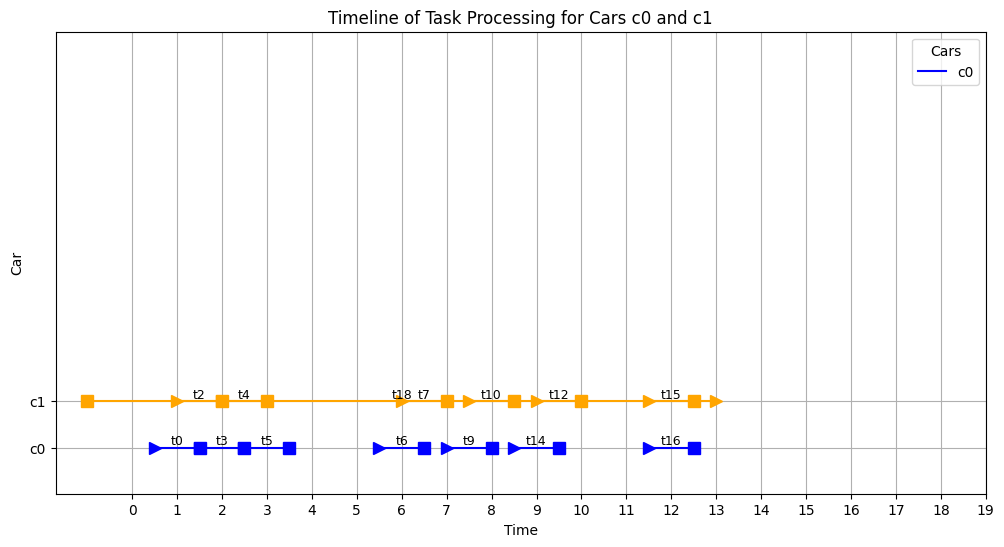

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('../results/Test/task_r_4_cf_config_file.ini_c_Test.csv', sep='\t')

# Filter data for each car
c0_data = df[df['processing_car'] == 'c0']
c1_data = df[df['processing_car'] == 'c1']

# Create a single plot
plt.figure(figsize=(12, 6))

# Plot tasks for c0 (y = 1)
for _, row in c0_data.iterrows():
    # Plot the task as a line
    plt.plot([row['processing_start'], row['processing_end']], [1, 1], color='blue', label='c0' if _ == 0 else "")
    # Plot the start marker
    plt.plot(row['processing_start'], 1, marker='>', color='blue', markersize=8)  # Start marker
    # Plot the end marker
    plt.plot(row['processing_end'], 1, marker='s', color='blue', markersize=8)  # End marker
    # Add task name as text at the midpoint of the line
    midpoint = (row['processing_start'] + row['processing_end']) / 2
    plt.text(midpoint, 1, row['task_id'], color='black', fontsize=9, ha='center', va='bottom')

# Plot tasks for c1 (y = 2)
for _, row in c1_data.iterrows():
    # Plot the task as a line
    plt.plot([row['processing_start'], row['processing_end']], [2, 2], color='orange', label='c1' if _ == 0 else "")
    # Plot the start marker
    plt.plot(row['processing_start'], 2, marker='>', color='orange', markersize=8)  # Start marker
    # Plot the end marker
    plt.plot(row['processing_end'], 2, marker='s', color='orange', markersize=8)  # End marker
    # Add task name as text at the midpoint of the line
    midpoint = (row['processing_start'] + row['processing_end']) / 2
    plt.text(midpoint, 2, row['task_id'], color='black', fontsize=9, ha='center', va='bottom')

# Add labels and title
plt.title('Timeline of Task Processing for Cars c0 and c1')
plt.xlabel('Time')
plt.xticks(np.arange(0, 20, step=1))
plt.ylabel('Car')
plt.yticks([1, 2], ['c0', 'c1'])  # Map y-axis values to car labels
plt.ylim(0, 10)  # Set y-axis range from 0 to 10

# Explicitly create the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicates
plt.legend(by_label.values(), by_label.keys(), title="Cars")  # Add legend with title

plt.grid(True)
plt.show()

In [5]:
import os
import pandas as pd

# Define the directories containing the CSV files
directories = [
    '../results/Test',
    '../results/Test-2',
    '../results/Test-3',
    '../results/Test-4',
    '../results/Test-5',
    '../results/Test-6'
]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each specified directory
for directory in directories:
    # Loop through all files in the current directory
    for filename in os.listdir(directory):
        # Check if the filename starts with "task" and ends with ".csv"
        if filename.startswith('task') and filename.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path, sep='\t')
            
            # Append the DataFrame to the list
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('./tasks_merged_results.csv', index=False)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file
df = pd.read_csv('./tasks_merged_results.csv')

grouped = df.groupby(['config', 'status', 'policy', 'lambda_exp']).size().reset_index(name='task_count')
# display(grouped)

# Calculate the total tasks for each Status
grouped['total_tasks_per_status'] = grouped.groupby(['config', 'policy', 'lambda_exp'])['task_count'].transform('sum')

# Calculate the ratio of tasks for each group
grouped['task_ratio'] = grouped['task_count'] / grouped['total_tasks_per_status']

# Drop the intermediate column (optional)
grouped = grouped.drop(columns=['total_tasks_per_status'])

display(grouped.head(10))

#####################################################

# # Load the merged CSV file
# df = pd.read_csv('./tasks_merged_results.csv')

# # Count tasks per (config, status, policy, lambda_exp, repetition)
# grouped = df.groupby(['config', 'status', 'policy', 'lambda_exp', 'repetition']).size().reset_index(name='task_count')

# # Calculate the total tasks per repetition
# grouped['total_tasks_per_repetition'] = grouped.groupby(['config', 'policy', 'lambda_exp', 'repetition'])['task_count'].transform('sum')

# # Compute task ratio per repetition
# grouped['task_ratio_per_repetition'] = grouped['task_count'] / grouped['total_tasks_per_repetition']

# # Compute mean task ratio across repetitions
# grouped_mean = grouped.groupby(['config', 'status', 'policy', 'lambda_exp'])['task_ratio_per_repetition'].mean().reset_index()

# grouped_mean.rename(columns={'task_ratio_per_repetition': 'mean_task_ratio'}, inplace=True)

# # Display or save the final result
# display(grouped_mean.head(10))



# # Pivot the data for easier plotting
# pivot_df = grouped.pivot_table(index=['Config', 'Policy'], columns='Status', values='Task Ratio', fill_value=0)
# display(pivot_df)

# # Plotting
# pivot_df.plot(kind='bar', stacked=True, colormap='viridis')

# # Add labels and title
# plt.xlabel('Policy')
# plt.ylabel('Task Ratio')
# plt.title('Task Ratio by Policy and Status (Stacked Bar Plot)')
# plt.legend(title='Status')
# plt.xticks(rotation=45)  # Keep policy labels horizontal
# plt.tight_layout()
# plt.show()

# ########################

# # Plot settings
# configs = df['Config'].unique()
# policies = df['Policy'].unique()
# statuses = df['Status'].unique()
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example colors for statuses

# edge_color = 'gray'  # Border color for all bars

# # Adjust bar width and spacing
# bar_width = 0.15  # Adjusts the width of individual bars
# group_spacing = 0.6  # Controls space between different Config groups

# x = np.arange(len(configs)) * (1 + group_spacing)  # Space out Config groups
# policy_offsets = np.linspace(-bar_width * len(policies) / 2, bar_width * len(policies) / 2, len(policies)) 

# fig, ax = plt.subplots(figsize=(10, 6))

# for i, policy in enumerate(policies):
#     bottom_heights = np.zeros(len(configs))  # Track bottom positions for stacking
    
#     for j, status in enumerate(statuses):
#         heights = [pivot_df.loc[(config, policy), status] if (config, policy) in pivot_df.index else 0
#                    for config in configs]
        
#         # Plot stacked bars with custom spacing and edgecolor
#         ax.bar(x + policy_offsets[i], heights, bar_width, label=f'{policy} - Status {status}' if j == 0 else "",
#                color=colors[j], edgecolor=edge_color, linewidth=1.2, bottom=bottom_heights)

#         # Update bottom heights for stacking
#         bottom_heights += np.array(heights)

# # Add labels and legend
# ax.set_xticks(x)
# ax.set_xticklabels(configs)
# ax.set_xlabel('Config')
# ax.set_ylabel('Task Ratio')
# ax.set_title('Task Ratios by Config, Policy, and Status')
# ax.legend(title='Policy & Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# plt.show()


,config,status,policy,lambda_exp,task_count,task_ratio
0,Test,0,earliest_deadline,1.0,12,0.071856
1,Test,0,earliest_deadline,2.0,148,0.466877
2,Test,0,lowest_complexity,1.0,12,0.071856
3,Test,0,lowest_complexity,2.0,140,0.444444
4,Test,0,random,1.0,12,0.072289
5,Test,0,random,2.0,121,0.384127
6,Test,2,earliest_deadline,0.5,83,0.976471
7,Test,2,earliest_deadline,1.0,144,0.862275
8,Test,2,earliest_deadline,2.0,145,0.457413
9,Test,2,lowest_complexity,0.5,83,0.976471


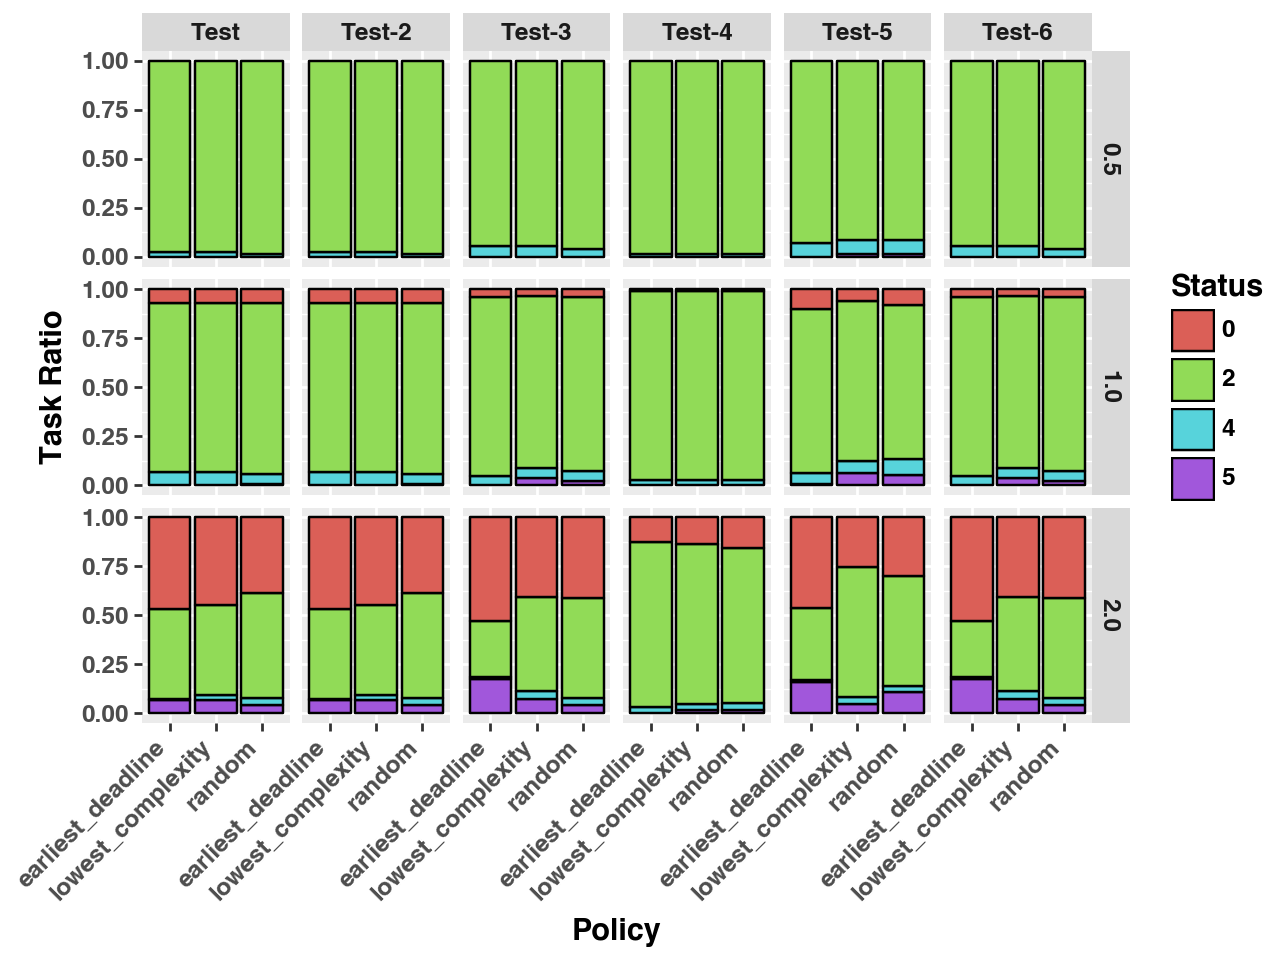

/home/memedi/.pyenv/versions/3.11.10/lib/python3.11/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.299212598425196 x 4.724409448818897 in image.
/home/memedi/.pyenv/versions/3.11.10/lib/python3.11/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: my_plot.pdf


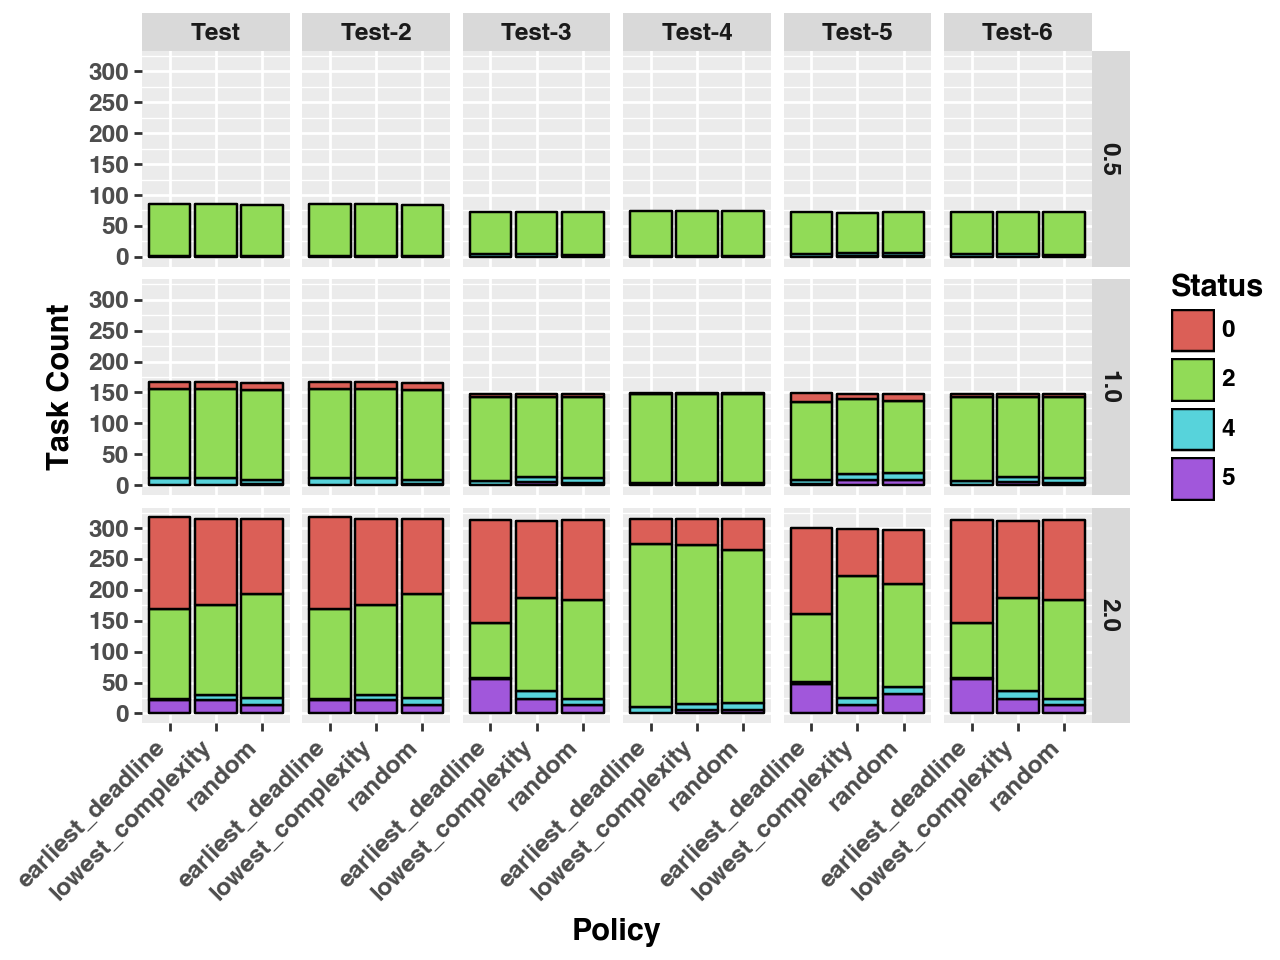

,config,status,policy,lambda_exp,task_count,task_ratio
0,Test,0,earliest_deadline,1.0,12,0.071856
1,Test,0,earliest_deadline,2.0,148,0.466877
2,Test,0,lowest_complexity,1.0,12,0.071856
3,Test,0,lowest_complexity,2.0,140,0.444444
4,Test,0,random,1.0,12,0.072289
...,...,...,...,...,...,...
167,Test-6,5,earliest_deadline,2.0,55,0.175719
168,Test-6,5,lowest_complexity,1.0,5,0.033784
169,Test-6,5,lowest_complexity,2.0,23,0.073718
170,Test-6,5,random,1.0,3,0.020270


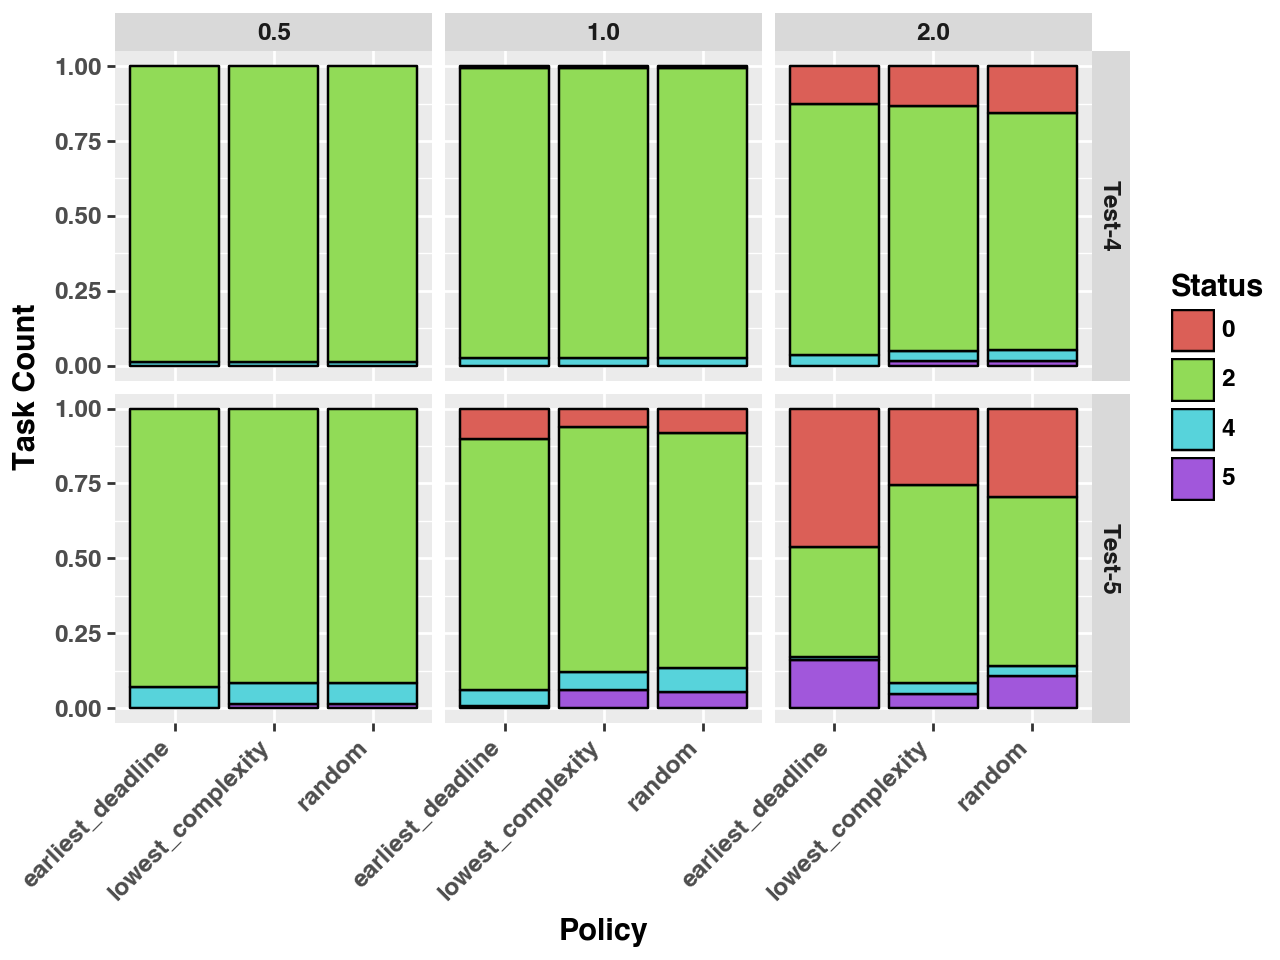

In [23]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text, labs, scale_y_continuous, facet_grid, xlim

df = grouped

# Create the plot using ggplot
plot = (
    ggplot(df, aes(x="policy", y="task_ratio", fill="factor(status)")) +
    geom_bar(stat="identity", position="stack", color="black") +  # Stacked bars with black borders
    facet_grid(cols="config", rows="lambda_exp") +  # Separate plots for each Config
    labs(x="Policy",
         y="Task Ratio",
         fill="Status") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels for readability
)

display(plot)
plot.save("my_plot.pdf", format="pdf", width=cm2inch(16), height=cm2inch(12), dpi=300)


plot = (
    ggplot(df, aes(x="policy", y="task_count", fill="factor(status)")) +
    geom_bar(stat="identity", position="stack", color="black") +  # Stacked bars with black borders
    facet_grid(cols="config", rows="lambda_exp") +  # Separate plots for each Config
    labs(x="Policy",
         y="Task Count",
         fill="Status") +
    scale_y_continuous(breaks=range(0, 351, 50)) +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels for readability
)

# Main df access notation: geom_point(aes(x=df['x'], y=df['y']), color='red')

display(plot)

#################################

blla = df[df['config'].isin(['Test-4','Test-5'])]

display(df)

test = (
    ggplot(blla, aes(x="policy", y="task_ratio", fill="factor(status)")) +
    geom_bar(stat="identity", position="stack", color="black") +  # Stacked bars with black borders
    facet_grid(cols="lambda_exp", rows="config") +  # Separate plots for each Config
    labs(x="Policy",
         y="Task Count",
         fill="Status") +
    scale_y_continuous(breaks=[i * 0.25 for i in range(11)]) +
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels for readability
)

display(test)

In [8]:
# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each specified directory
for directory in directories:
    # Loop through all files in the current directory
    for filename in os.listdir(directory):
        # Check if the filename starts with "car" and ends with ".csv"
        if filename.startswith('car') and filename.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path, sep='\t')
            
            # Append the DataFrame to the list
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df_2 = pd.concat(dataframes, ignore_index=True)

# display(merged_df_2)

# Save the merged DataFrame to a new CSV file
merged_df_2.to_csv('./cars_merged_results.csv', index=False, sep='\t')

,config,policy,lambda_exp,average_busy_ratio
0,Test,earliest_deadline,0.5,0.329396
1,Test,earliest_deadline,1.0,0.591415
2,Test,earliest_deadline,2.0,0.601442
3,Test,lowest_complexity,0.5,0.329396
4,Test,lowest_complexity,1.0,0.591415
5,Test,lowest_complexity,2.0,0.590453
6,Test,random,0.5,0.326717
7,Test,random,1.0,0.595261
8,Test,random,2.0,0.698489
9,Test-2,earliest_deadline,0.5,0.329396


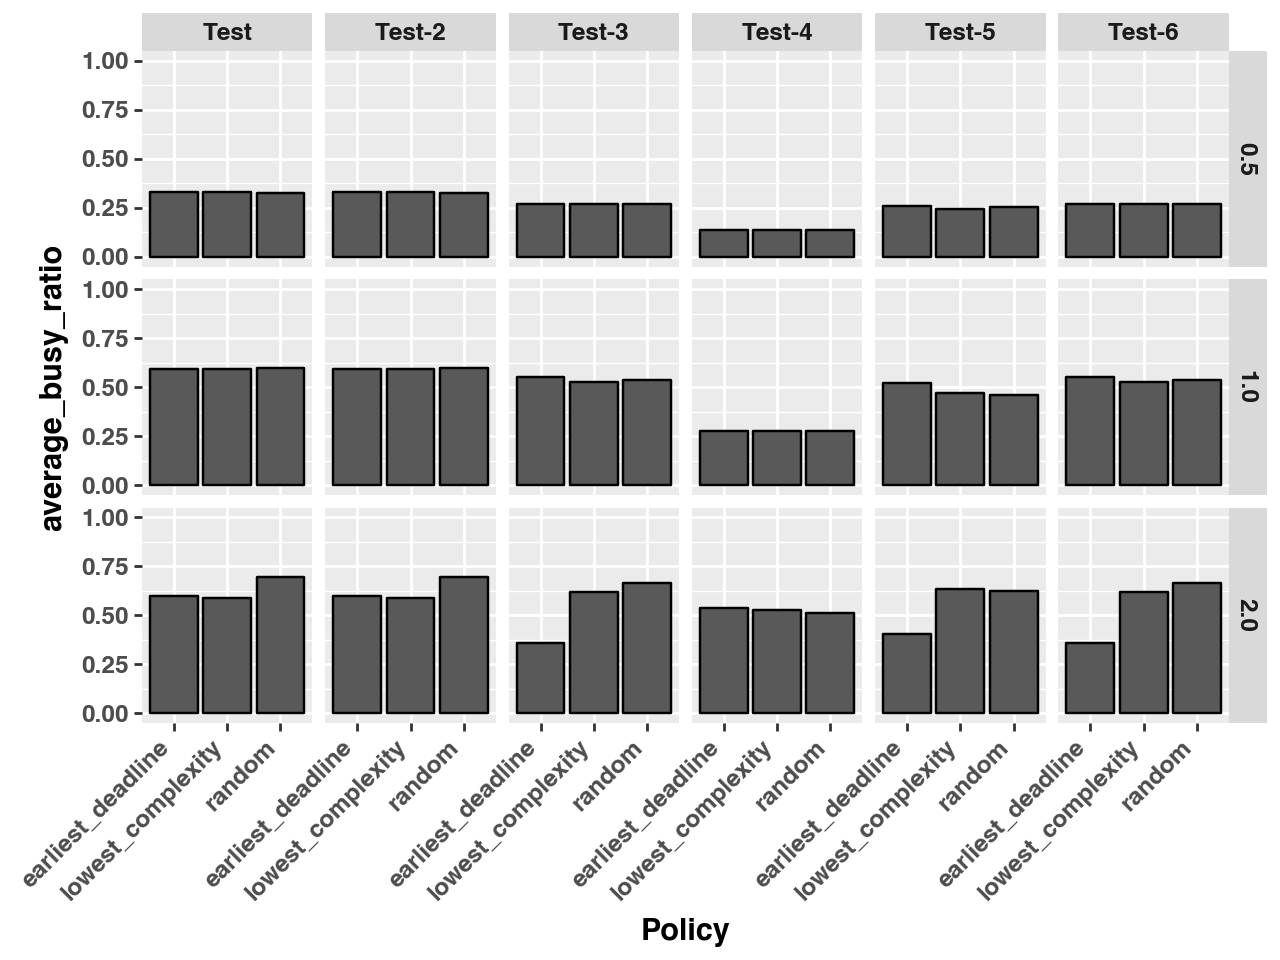

In [9]:
# print(merged_df_2)

new_df = pysqldf("""
                 SELECT config, policy, lambda_exp,
                 AVG(total_processing_time / lifetime) AS average_busy_ratio
                 FROM merged_df_2
                 GROUP BY config, policy, lambda_exp;
                 """)

display(new_df)

# Create the plot using ggplot
plot = (
    ggplot(new_df, aes(x="policy", y="average_busy_ratio")) +
    geom_bar(stat="identity", position="stack", color="black") +  # Stacked bars with black borders
    facet_grid(cols="config", rows="lambda_exp") +  # Separate plots for each Config
    labs(x="Policy",
         y="average_busy_ratio") +
    scale_y_continuous(limits=(0, 1)) +  
    theme(axis_text_x=element_text(rotation=45, hjust=1))  # Rotate x-axis labels for readability
)

display(plot)